Import various packages and mount google drive. 

In [ ]:
import os
import time

import numpy as np
import pandas as pd

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Subset

from torchvision import datasets
from torchvision import transforms

import matplotlib.pyplot as plt
from PIL import Image

import math
import copy

from google.colab import drive
drive.mount('/content/drive')

device = torch.device('cuda:0')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Change drive to the one containing the Jacobian folder

In [ ]:
cd drive/'My Drive'

/content/drive/My Drive


In [ ]:
from Jacobian.jacobian import *
from Jacobian.utils import *

Get the data loaders.

In [ ]:
_,_, train_loader, test_loader = get_data(train_batch_size=200, test_batch_size=100)

Files already downloaded and verified
Files already downloaded and verified


Load an untrained ResNet20 for Cifar10. 

In [23]:
!pip install pytorchcv
import pytorchcv
from pytorchcv.model_provider import get_model as ptcv_get_model
thismodel = 'resnet20_cifar10'
model = ptcv_get_model(thismodel, pretrained=False)


In [24]:
#Send model to GPU
model = model.to("cuda")

In [25]:
model

CIFARResNet(
  (features): Sequential(
    (init_block): ConvBlock(
      (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (activ): ReLU(inplace=True)
    )
    (stage1): Sequential(
      (unit1): ResUnit(
        (body): ResBlock(
          (conv1): ConvBlock(
            (conv): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
            (bn): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (activ): ReLU(inplace=True)
          )
          (conv2): ConvBlock(
            (conv): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
            (bn): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          )
        )
        (activ): ReLU(inplace=True)
      )
      (unit2): ResUnit(
        (body): ResBlock(
          (co

Compute accuracy before training. 

In [26]:
train_acc = compute_acc(model, train_loader, device)        
print(f'train ACC: {train_acc:.2f}, seed: {0}')
        
test_acc = compute_acc(model, test_loader, device)        
print(f'Test ACC: {test_acc:.2f}')

train ACC: 10.01, seed: 0
Test ACC: 10.00


In [27]:
optimizer = torch.optim.SGD(model.parameters(), .01, momentum=0.9, weight_decay=0)
scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, [50, 100, 150], gamma=0.1, last_epoch=-1)

Train and compute Jacobian spectrum progression.

Epoch: 001/075 | Batch 000/250 | Cost: 2.6410
Epoch: 001/075 | Batch 150/250 | Cost: 1.5126
Max Eigenvalue: 0.46240723


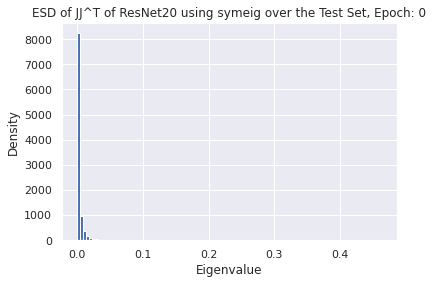

Iteration 0 of n_vec
Iteration 1 of n_vec
Iteration 2 of n_vec
Iteration 3 of n_vec
Iteration 4 of n_vec
Iteration 5 of n_vec
Iteration 6 of n_vec
Iteration 7 of n_vec
Iteration 8 of n_vec
Iteration 9 of n_vec


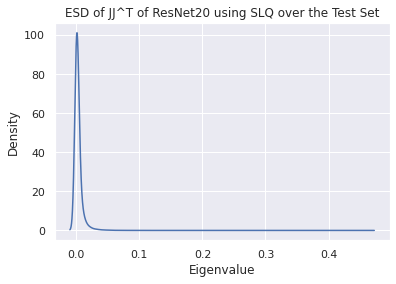

Computing top eigenvalue.
Finished top eigenvalue, computing mu
Rescaling M
Done Rescaling M


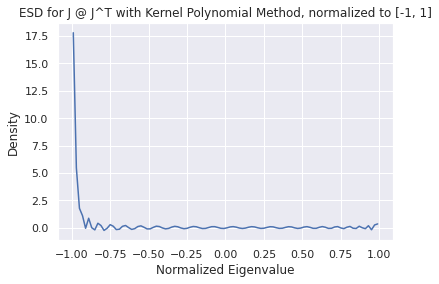

Epoch: 001/075
Train ACC: 45.74
Epoch: 002/075 | Batch 000/250 | Cost: 1.4139
Epoch: 002/075 | Batch 150/250 | Cost: 1.2561
Epoch: 002/075
Train ACC: 54.15
Epoch: 003/075 | Batch 000/250 | Cost: 1.1148
Epoch: 003/075 | Batch 150/250 | Cost: 1.1385
Epoch: 003/075
Train ACC: 57.70
Epoch: 004/075 | Batch 000/250 | Cost: 0.9504
Epoch: 004/075 | Batch 150/250 | Cost: 1.0669
Epoch: 004/075
Train ACC: 64.69
Epoch: 005/075 | Batch 000/250 | Cost: 0.8331
Epoch: 005/075 | Batch 150/250 | Cost: 0.9544
Epoch: 005/075
Train ACC: 66.33
Epoch: 006/075 | Batch 000/250 | Cost: 0.7177
Epoch: 006/075 | Batch 150/250 | Cost: 0.8630
Epoch: 006/075
Train ACC: 69.77
Epoch: 007/075 | Batch 000/250 | Cost: 0.6584
Epoch: 007/075 | Batch 150/250 | Cost: 0.7715
Epoch: 007/075
Train ACC: 72.54
Epoch: 008/075 | Batch 000/250 | Cost: 0.6304
Epoch: 008/075 | Batch 150/250 | Cost: 0.7220
Epoch: 008/075
Train ACC: 72.86
Epoch: 009/075 | Batch 000/250 | Cost: 0.5854
Epoch: 009/075 | Batch 150/250 | Cost: 0.6842
Epoch: 0

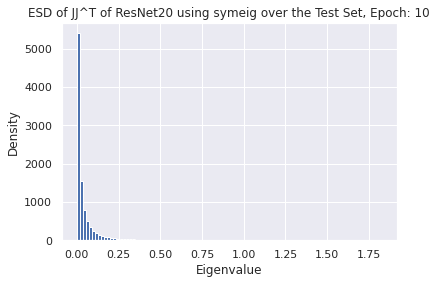

Iteration 0 of n_vec
Iteration 1 of n_vec
Iteration 2 of n_vec
Iteration 3 of n_vec
Iteration 4 of n_vec
Iteration 5 of n_vec
Iteration 6 of n_vec
Iteration 7 of n_vec
Iteration 8 of n_vec
Iteration 9 of n_vec


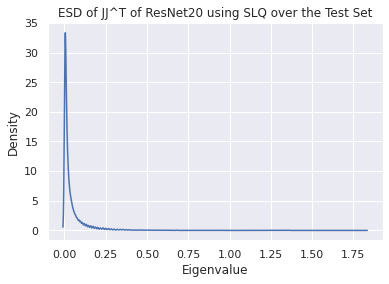

Computing top eigenvalue.
Finished top eigenvalue, computing mu
Rescaling M
Done Rescaling M


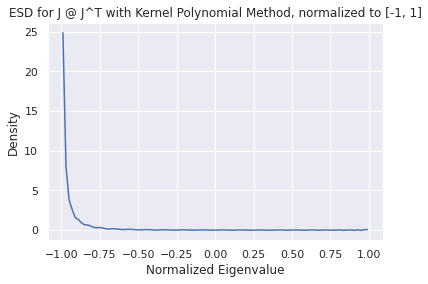

Epoch: 011/075
Train ACC: 74.25
Epoch: 012/075 | Batch 000/250 | Cost: 0.4636
Epoch: 012/075 | Batch 150/250 | Cost: 0.5878
Epoch: 012/075
Train ACC: 72.99
Epoch: 013/075 | Batch 000/250 | Cost: 0.4337
Epoch: 013/075 | Batch 150/250 | Cost: 0.5894
Epoch: 013/075
Train ACC: 73.10
Epoch: 014/075 | Batch 000/250 | Cost: 0.3859
Epoch: 014/075 | Batch 150/250 | Cost: 0.5126
Epoch: 014/075
Train ACC: 73.51
Epoch: 015/075 | Batch 000/250 | Cost: 0.3141
Epoch: 015/075 | Batch 150/250 | Cost: 0.4489
Epoch: 015/075
Train ACC: 73.30
Epoch: 016/075 | Batch 000/250 | Cost: 0.3375
Epoch: 016/075 | Batch 150/250 | Cost: 0.4496
Epoch: 016/075
Train ACC: 73.32
Epoch: 017/075 | Batch 000/250 | Cost: 0.3342
Epoch: 017/075 | Batch 150/250 | Cost: 0.3191
Epoch: 017/075
Train ACC: 71.31
Epoch: 018/075 | Batch 000/250 | Cost: 0.3180
Epoch: 018/075 | Batch 150/250 | Cost: 0.3978
Epoch: 018/075
Train ACC: 71.32
Epoch: 019/075 | Batch 000/250 | Cost: 0.2521
Epoch: 019/075 | Batch 150/250 | Cost: 0.3440
Epoch: 0

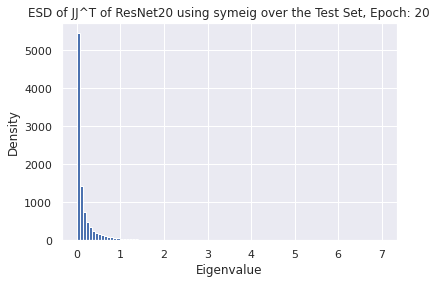

Iteration 0 of n_vec
Iteration 1 of n_vec
Iteration 2 of n_vec
Iteration 3 of n_vec
Iteration 4 of n_vec
Iteration 5 of n_vec
Iteration 6 of n_vec
Iteration 7 of n_vec
Iteration 8 of n_vec
Iteration 9 of n_vec


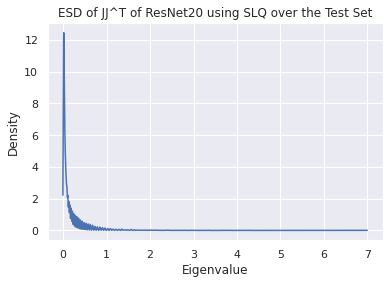

Computing top eigenvalue.
Finished top eigenvalue, computing mu
Rescaling M
Done Rescaling M


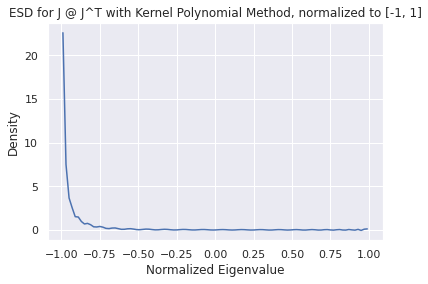

Epoch: 021/075
Train ACC: 71.78
Epoch: 022/075 | Batch 000/250 | Cost: 0.2416
Epoch: 022/075 | Batch 150/250 | Cost: 0.2351
Epoch: 022/075
Train ACC: 62.47
Epoch: 023/075 | Batch 000/250 | Cost: 0.2592
Epoch: 023/075 | Batch 150/250 | Cost: 0.2342
Epoch: 023/075
Train ACC: 73.09
Epoch: 024/075 | Batch 000/250 | Cost: 0.1374
Epoch: 024/075 | Batch 150/250 | Cost: 0.1674
Epoch: 024/075
Train ACC: 80.97
Epoch: 025/075 | Batch 000/250 | Cost: 0.1953
Epoch: 025/075 | Batch 150/250 | Cost: 0.2345
Epoch: 025/075
Train ACC: 81.38
Epoch: 026/075 | Batch 000/250 | Cost: 0.1723
Epoch: 026/075 | Batch 150/250 | Cost: 0.1851
Epoch: 026/075
Train ACC: 70.56
Epoch: 027/075 | Batch 000/250 | Cost: 0.1121
Epoch: 027/075 | Batch 150/250 | Cost: 0.1307
Epoch: 027/075
Train ACC: 78.72
Epoch: 028/075 | Batch 000/250 | Cost: 0.1315
Epoch: 028/075 | Batch 150/250 | Cost: 0.1548
Epoch: 028/075
Train ACC: 79.46
Epoch: 029/075 | Batch 000/250 | Cost: 0.1360
Epoch: 029/075 | Batch 150/250 | Cost: 0.1350
Epoch: 0

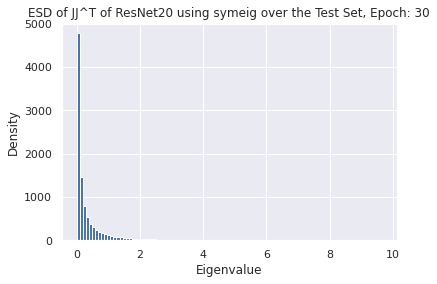

Iteration 0 of n_vec
Iteration 1 of n_vec
Iteration 2 of n_vec
Iteration 3 of n_vec
Iteration 4 of n_vec
Iteration 5 of n_vec
Iteration 6 of n_vec
Iteration 7 of n_vec
Iteration 8 of n_vec
Iteration 9 of n_vec


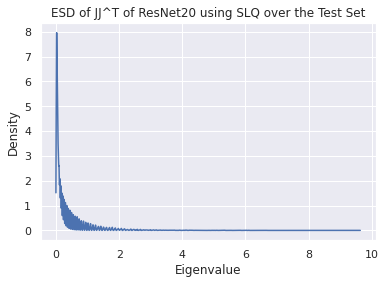

Computing top eigenvalue.
Finished top eigenvalue, computing mu
Rescaling M
Done Rescaling M


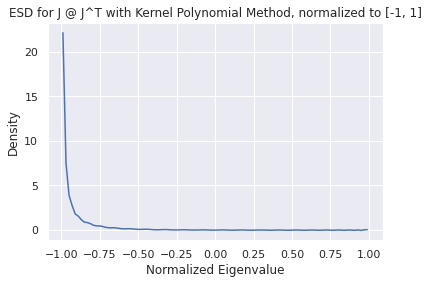

Epoch: 031/075
Train ACC: 89.47
Epoch: 032/075 | Batch 000/250 | Cost: 0.1334
Epoch: 032/075 | Batch 150/250 | Cost: 0.0902
Epoch: 032/075
Train ACC: 87.71
Epoch: 033/075 | Batch 000/250 | Cost: 0.0915
Epoch: 033/075 | Batch 150/250 | Cost: 0.0578
Epoch: 033/075
Train ACC: 88.56
Epoch: 034/075 | Batch 000/250 | Cost: 0.0243
Epoch: 034/075 | Batch 150/250 | Cost: 0.0646
Epoch: 034/075
Train ACC: 92.23
Epoch: 035/075 | Batch 000/250 | Cost: 0.0559
Epoch: 035/075 | Batch 150/250 | Cost: 0.0414
Epoch: 035/075
Train ACC: 92.77
Epoch: 036/075 | Batch 000/250 | Cost: 0.0464
Epoch: 036/075 | Batch 150/250 | Cost: 0.0292
Epoch: 036/075
Train ACC: 93.99
Epoch: 037/075 | Batch 000/250 | Cost: 0.0709
Epoch: 037/075 | Batch 150/250 | Cost: 0.0319
Epoch: 037/075
Train ACC: 93.95
Epoch: 038/075 | Batch 000/250 | Cost: 0.0210
Epoch: 038/075 | Batch 150/250 | Cost: 0.0236
Epoch: 038/075
Train ACC: 96.88
Epoch: 039/075 | Batch 000/250 | Cost: 0.0313
Epoch: 039/075 | Batch 150/250 | Cost: 0.0173
Epoch: 0

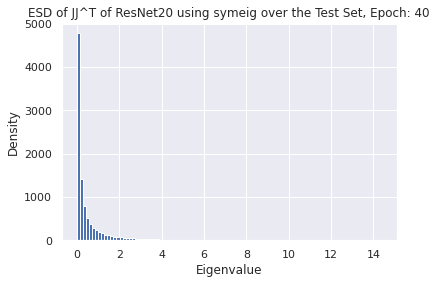

Iteration 0 of n_vec
Iteration 1 of n_vec
Iteration 2 of n_vec
Iteration 3 of n_vec
Iteration 4 of n_vec
Iteration 5 of n_vec
Iteration 6 of n_vec
Iteration 7 of n_vec
Iteration 8 of n_vec
Iteration 9 of n_vec


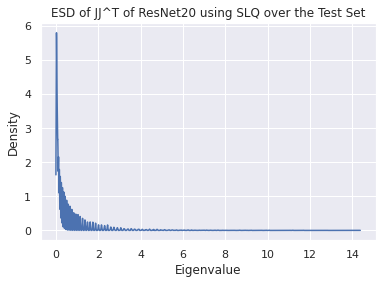

Computing top eigenvalue.
Finished top eigenvalue, computing mu
Rescaling M
Done Rescaling M


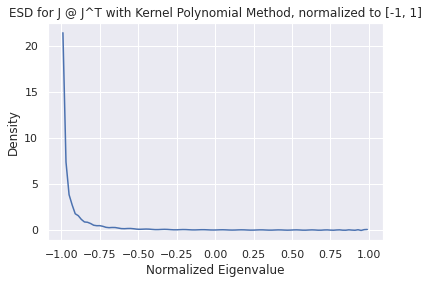

Epoch: 041/075
Train ACC: 99.59
Epoch: 042/075 | Batch 000/250 | Cost: 0.0079
Epoch: 042/075 | Batch 150/250 | Cost: 0.0021
Epoch: 042/075
Train ACC: 99.91
Epoch: 043/075 | Batch 000/250 | Cost: 0.0034
Epoch: 043/075 | Batch 150/250 | Cost: 0.0017
Epoch: 043/075
Train ACC: 99.98
Epoch: 044/075 | Batch 000/250 | Cost: 0.0013
Epoch: 044/075 | Batch 150/250 | Cost: 0.0010
Epoch: 044/075
Train ACC: 100.00
Epoch: 045/075 | Batch 000/250 | Cost: 0.0009
Epoch: 045/075 | Batch 150/250 | Cost: 0.0009
Epoch: 045/075
Train ACC: 100.00
Epoch: 046/075 | Batch 000/250 | Cost: 0.0007
Epoch: 046/075 | Batch 150/250 | Cost: 0.0008
Epoch: 046/075
Train ACC: 100.00
Epoch: 047/075 | Batch 000/250 | Cost: 0.0006
Epoch: 047/075 | Batch 150/250 | Cost: 0.0007
Epoch: 047/075
Train ACC: 100.00
Epoch: 048/075 | Batch 000/250 | Cost: 0.0006
Epoch: 048/075 | Batch 150/250 | Cost: 0.0007
Epoch: 048/075
Train ACC: 100.00
Epoch: 049/075 | Batch 000/250 | Cost: 0.0005
Epoch: 049/075 | Batch 150/250 | Cost: 0.0006
Epo

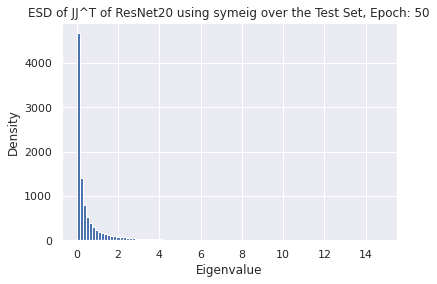

Iteration 0 of n_vec
Iteration 1 of n_vec
Iteration 2 of n_vec
Iteration 3 of n_vec
Iteration 4 of n_vec
Iteration 5 of n_vec
Iteration 6 of n_vec
Iteration 7 of n_vec
Iteration 8 of n_vec
Iteration 9 of n_vec


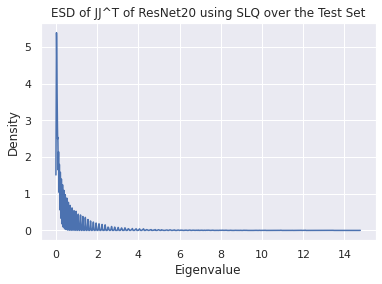

Computing top eigenvalue.
Finished top eigenvalue, computing mu
Rescaling M
Done Rescaling M


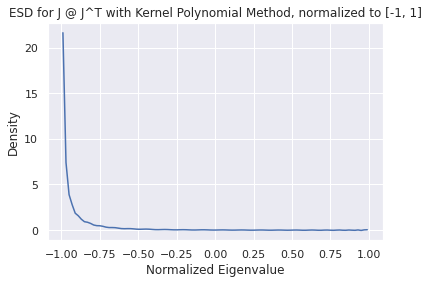

Epoch: 051/075
Train ACC: 100.00
Epoch: 052/075 | Batch 000/250 | Cost: 0.0005
Epoch: 052/075 | Batch 150/250 | Cost: 0.0006
Epoch: 052/075
Train ACC: 100.00
Epoch: 053/075 | Batch 000/250 | Cost: 0.0005
Epoch: 053/075 | Batch 150/250 | Cost: 0.0006
Epoch: 053/075
Train ACC: 100.00
Epoch: 054/075 | Batch 000/250 | Cost: 0.0005
Epoch: 054/075 | Batch 150/250 | Cost: 0.0006
Epoch: 054/075
Train ACC: 100.00
Epoch: 055/075 | Batch 000/250 | Cost: 0.0004
Epoch: 055/075 | Batch 150/250 | Cost: 0.0006
Epoch: 055/075
Train ACC: 100.00
Epoch: 056/075 | Batch 000/250 | Cost: 0.0004
Epoch: 056/075 | Batch 150/250 | Cost: 0.0006
Epoch: 056/075
Train ACC: 100.00
Epoch: 057/075 | Batch 000/250 | Cost: 0.0004
Epoch: 057/075 | Batch 150/250 | Cost: 0.0006
Epoch: 057/075
Train ACC: 100.00
Epoch: 058/075 | Batch 000/250 | Cost: 0.0004
Epoch: 058/075 | Batch 150/250 | Cost: 0.0006
Epoch: 058/075
Train ACC: 100.00
Epoch: 059/075 | Batch 000/250 | Cost: 0.0004
Epoch: 059/075 | Batch 150/250 | Cost: 0.0006


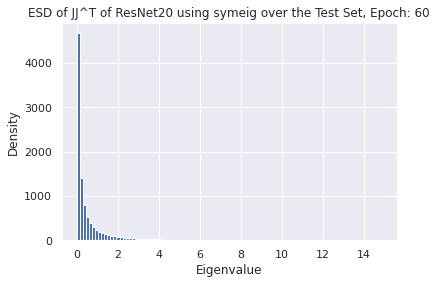

Iteration 0 of n_vec
Iteration 1 of n_vec
Iteration 2 of n_vec
Iteration 3 of n_vec
Iteration 4 of n_vec
Iteration 5 of n_vec
Iteration 6 of n_vec
Iteration 7 of n_vec
Iteration 8 of n_vec
Iteration 9 of n_vec


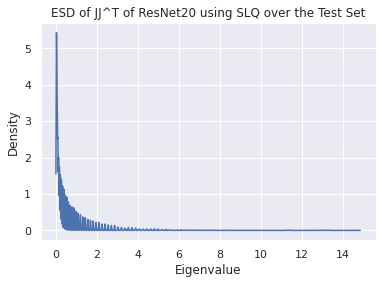

Computing top eigenvalue.
Finished top eigenvalue, computing mu
Rescaling M
Done Rescaling M


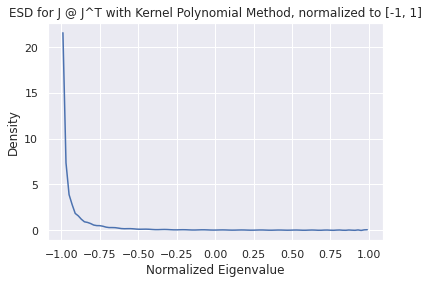

Epoch: 061/075
Train ACC: 100.00
Epoch: 062/075 | Batch 000/250 | Cost: 0.0004
Epoch: 062/075 | Batch 150/250 | Cost: 0.0006
Epoch: 062/075
Train ACC: 100.00
Epoch: 063/075 | Batch 000/250 | Cost: 0.0004
Epoch: 063/075 | Batch 150/250 | Cost: 0.0005
Epoch: 063/075
Train ACC: 100.00
Epoch: 064/075 | Batch 000/250 | Cost: 0.0004
Epoch: 064/075 | Batch 150/250 | Cost: 0.0005
Epoch: 064/075
Train ACC: 100.00
Epoch: 065/075 | Batch 000/250 | Cost: 0.0004
Epoch: 065/075 | Batch 150/250 | Cost: 0.0005
Epoch: 065/075
Train ACC: 100.00
Epoch: 066/075 | Batch 000/250 | Cost: 0.0004
Epoch: 066/075 | Batch 150/250 | Cost: 0.0005
Epoch: 066/075
Train ACC: 100.00
Epoch: 067/075 | Batch 000/250 | Cost: 0.0004
Epoch: 067/075 | Batch 150/250 | Cost: 0.0005
Epoch: 067/075
Train ACC: 100.00
Epoch: 068/075 | Batch 000/250 | Cost: 0.0004
Epoch: 068/075 | Batch 150/250 | Cost: 0.0005
Epoch: 068/075
Train ACC: 100.00
Epoch: 069/075 | Batch 000/250 | Cost: 0.0004
Epoch: 069/075 | Batch 150/250 | Cost: 0.0005


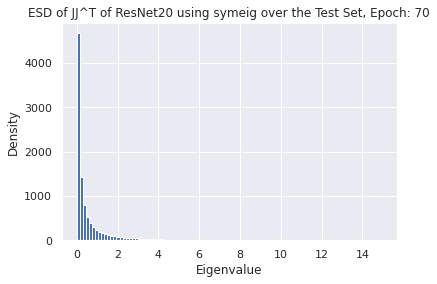

Iteration 0 of n_vec
Iteration 1 of n_vec
Iteration 2 of n_vec
Iteration 3 of n_vec
Iteration 4 of n_vec
Iteration 5 of n_vec
Iteration 6 of n_vec
Iteration 7 of n_vec
Iteration 8 of n_vec
Iteration 9 of n_vec


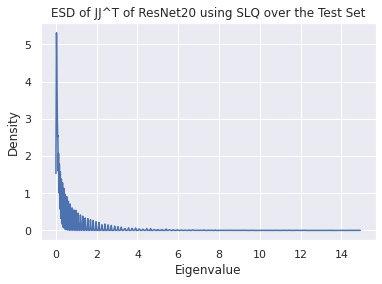

Computing top eigenvalue.
Finished top eigenvalue, computing mu
Rescaling M
Done Rescaling M


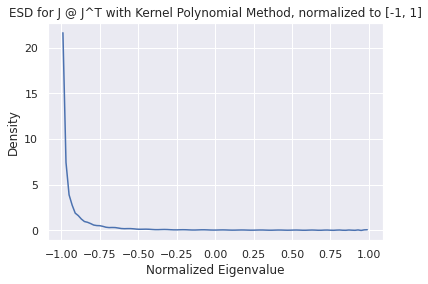

Epoch: 071/075
Train ACC: 100.00
Epoch: 072/075 | Batch 000/250 | Cost: 0.0004
Epoch: 072/075 | Batch 150/250 | Cost: 0.0005
Epoch: 072/075
Train ACC: 100.00
Epoch: 073/075 | Batch 000/250 | Cost: 0.0004
Epoch: 073/075 | Batch 150/250 | Cost: 0.0005
Epoch: 073/075
Train ACC: 100.00
Epoch: 074/075 | Batch 000/250 | Cost: 0.0004
Epoch: 074/075 | Batch 150/250 | Cost: 0.0005
Epoch: 074/075
Train ACC: 100.00
Epoch: 075/075 | Batch 000/250 | Cost: 0.0004
Epoch: 075/075 | Batch 150/250 | Cost: 0.0005
Epoch: 075/075
Train ACC: 100.00


In [28]:
import seaborn as sns
sns.set()

criterion = nn.CrossEntropyLoss()

cost_list = []
train_acc_list = []


epoch_max = 75

for epoch in range(epoch_max):
    model.train()
    for batch_idx, (features, targets) in enumerate(train_loader):
    # compute output
      features, targets = features.to("cuda:0"), targets.to("cuda:0")

      output = model(features)
      loss = criterion(output, targets)

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      cost_list.append(loss.item())
      if not batch_idx % 150:
        print (f'Epoch: {epoch+1:03d}/{epoch_max:03d} | '
                   f'Batch {batch_idx:03d}/{len(train_loader):03d} |' 
                   f' Cost: {loss:.4f}')
    
    if epoch % 10 == 0:
      model.eval()
      full_J = construct_diagJ(model, test_loader, batch_size=100, device='cuda:0') # The P100 on Colab should have enough memory to do this
      N, _ = full_J.shape
      M = 1/N*full_J @ full_J.t() 
      del full_J
      u, v = torch.symeig(M)
      #del M
      plt.hist(u.cpu().numpy(), bins=100)
      print("Max Eigenvalue:", u[-1].cpu().numpy())
      plt.title("ESD of JJ^T of ResNet20 using symeig over the Test Set, Epoch: " + str(epoch)) 
      plt.xlabel("Eigenvalue")
      plt.ylabel("Density")
      plt.show()

      eigs, dens = slq(M, n_vec=10, m=100)
      density, grids = density_generate(eigs, dens)
      plt.plot(grids, density)
      plt.title("ESD of JJ^T of ResNet20 using SLQ over the Test Set")
      plt.xlabel("Eigenvalue")
      plt.ylabel("Density")
      plt.show()

      mu = kernel_pm(M, m = 50)
      cheb = Cheby(mu)
      x = np.linspace(-.99, .99, 100)
      plt.plot(x, cheb.weighted_chebyshev(x))
      plt.title("ESD for J @ J^T with Kernel Polynomial Method, normalized to [-1, 1]")
      plt.xlabel("Normalized Eigenvalue")
      plt.ylabel("Density")
      plt.show()

      del M

    

    model.eval()
    with torch.set_grad_enabled(False): # save memory during inference
        
        train_acc = compute_acc(model, train_loader, device)        
        print(f'Epoch: {epoch+1:03d}/{epoch_max:03d}\n'
              f'Train ACC: {train_acc:.2f}')
        
        train_acc_list.append(train_acc)
    scheduler.step()



 

In [ ]:
test_acc = compute_acc(model, test_loader,device)        
print(f'Test ACC: {test_acc:.2f}')

Test ACC: 75.70
